# 📖 Background

The Board of a large corporation is concerned about the relatively elevated rate of employee turnover. This initiative aims to investigate potential solutions to minimize the number of departing employees, analyze the underlying causes for this phenomenon, identify the demographics of the departing staff, and propose actionable measures to address the issue.

# 💾 Data


The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.



> Features:


*   `department` - the department the employee belongs to
*   `promoted` - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
* `review` - the composite score the employee received in their last evaluation.
* `projects` - how many projects the employee is involved in.
* `salary` - for confidentiality reasons, salary comes in three tiers: low, medium, high.
* `tenure` - how many years the employee has been at the company.
* `satisfaction` - a measure of employee satisfaction from surveys.
* `bonus` - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.
* `avg_hrs_month` - the average hours the employee worked in a month.
* `left` - "yes" if the employee ended up leaving, "no" otherwise.








In [ ]:
# loading the dataframe 
import pandas as pd 
df = pd.read_csv('/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


#  📊 EDA

## Univariate Analysis 

### Categorical variables 

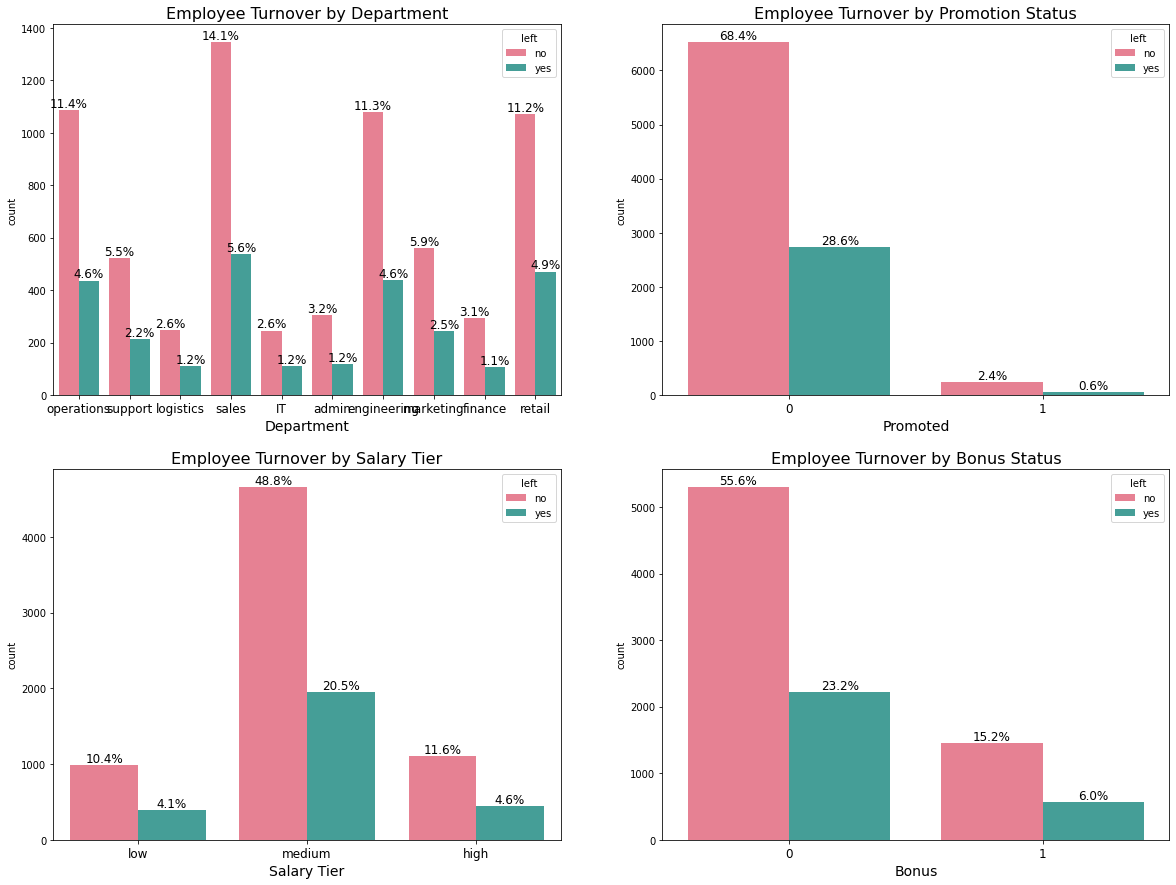

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger figure
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))

# Create countplots for each variable
sns.countplot(data=df, x='department', hue='left', palette='husl', ax=axs[0, 0])
sns.countplot(data=df, x='promoted', hue='left', palette='husl', ax=axs[0, 1])
sns.countplot(data=df, x='salary', hue='left', palette='husl', ax=axs[1, 0])
sns.countplot(data=df, x='bonus', hue='left', palette='husl', ax=axs[1, 1])

# Set the x-axis labels and titles
axs[0, 0].set_xlabel('Department', fontsize=14)
axs[0, 0].set_title('Employee Turnover by Department', fontsize=16)
axs[0, 1].set_xlabel('Promoted', fontsize=14)
axs[0, 1].set_title('Employee Turnover by Promotion Status', fontsize=16)
axs[1, 0].set_xlabel('Salary Tier', fontsize=14)
axs[1, 0].set_title('Employee Turnover by Salary Tier', fontsize=16)
axs[1, 1].set_xlabel('Bonus', fontsize=14)
axs[1, 1].set_title('Employee Turnover by Bonus Status', fontsize=16)

# Adjust the font size of the x-axis tick labels
for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=12)

# Loop through each bar in each plot and add text labels for the percentages
for ax in axs.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.1f}%'.format(p.get_height()/len(df)*100), 
                    ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()







### numerical variables

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

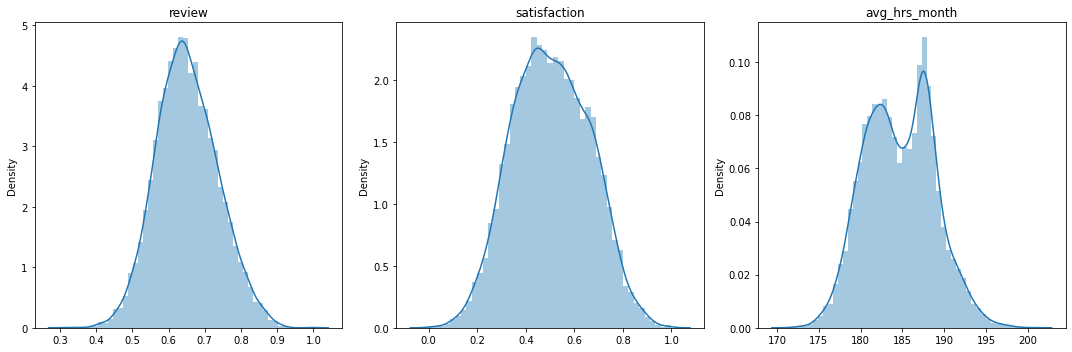

In [ ]:
# Select only the numerical variables
num_vars = ["review","satisfaction", "avg_hrs_month"]

# Set up the figure with multiple axes
fig, axs = plt.subplots(ncols=len(num_vars), figsize=(15,5))

# Plot the distribution of each variable on its own axis
for i, var in enumerate(num_vars):
    sns.distplot(df[var], ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('')
    
plt.tight_layout()
plt.show()


The data reveals that employee satisfaction and review scores are `normally distributed`. This distribution enables us to identify a clear peak in satisfaction scores for employees with a mean satisfaction rating between 0.4 and 0.6. Similarly, we observe a peak in review scores for employees with a mean review rating between 0.6 and 0.8.

Moreover, the analysis of average monthly hours worked by employees indicates `a bimodal distribution`. Specifically, there are two distinct groups of employees with significantly different average monthly hours. One group works less than 180 hours while the other group works more than 185 hours.

## Multivariate Analysis

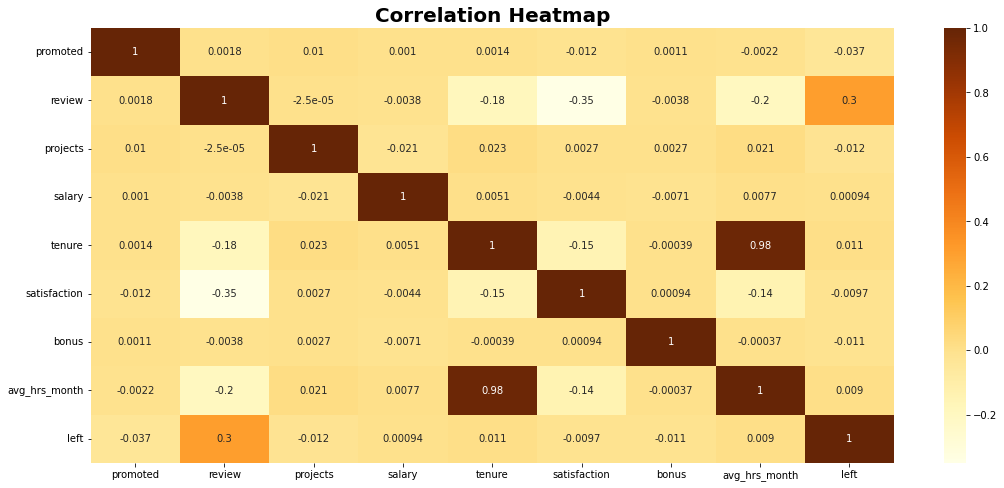

In [ ]:
from colorama import Fore, Style

# One hot encoding of left feature 
df['left'] = df['left'].apply(lambda x: 0 if x == 'no' else 1)

# Ordinal encoding of salary feature
df['salary'] = df['salary'].apply(lambda x: 1 if x == 'low' else (2 if x == 'medium' else 3))

# Rounding Review, Satisfaction and Avg_Hrs_Month
df[['review','satisfaction','avg_hrs_month']] = df[['review','satisfaction','avg_hrs_month']].apply(lambda x: round(x,2))

# Correlations analysis
#plot
cmap = sns.color_palette('YlOrBr', as_cmap=True)

plt.figure(figsize = (18, 8))
sns.heatmap(data = df.corr(), annot = True, cmap = cmap)

#customize
plt.title('Correlation Heatmap',fontsize = 20, fontweight = 'bold')

plt.show() 

The correlation heatmap suggests that there is a perfect correlation between `average hours of work` and `tenure`, indicating that these two variables explain the same information.

In addition, there appears to be a weak negative correlation between the `review` and `satisfaction` variables, suggesting that as one variable increases, the other tends to decrease slightly. Furthermore, there is a weak correlation between the `review` variable and the target variable `left`, indicating that there may be some relationship between these two variables but it is not strong.

## Outliers detection with Z-score method

In [ ]:
import numpy as np

# Calculate the mean and standard deviation for each variable
mean_avg_hrs_month = df['avg_hrs_month'].mean()
std_avg_hrs_month = df['avg_hrs_month'].std()

mean_tenure = df['tenure'].mean()
std_tenure = df['tenure'].std()


# Calculate the Z-scores for all data points

z_scores_avg_hrs_month = np.abs((df['avg_hrs_month'] - mean_avg_hrs_month) / std_avg_hrs_month)
z_scores_tenure = np.abs((df['tenure'] - mean_tenure) / std_tenure)

# Set threshold for detecting outliers 

outliers_avg_hrs_month = df[z_scores_avg_hrs_month > 3.5]
outliers_tenure = df[z_scores_tenure > 3.5]


# Print the results 

print(outliers_avg_hrs_month['avg_hrs_month'])
print(outliers_tenure['tenure'])



5723    200.86
6456    199.30
7946    199.38
Name: avg_hrs_month, dtype: float64
5723    12.0
Name: tenure, dtype: float64


After performing the Z-test for outliers on the `avg_hrs_month` and `tenure` variables in the dataset, it was found that there are outliers present in the dataset. However, this does not necessarily mean that these values are wrong.
In fact the outliers seem logical and normal within the context of the dataset.

# 🧑 Cluster Analysis & Segmentation

## Selecting the optimal number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

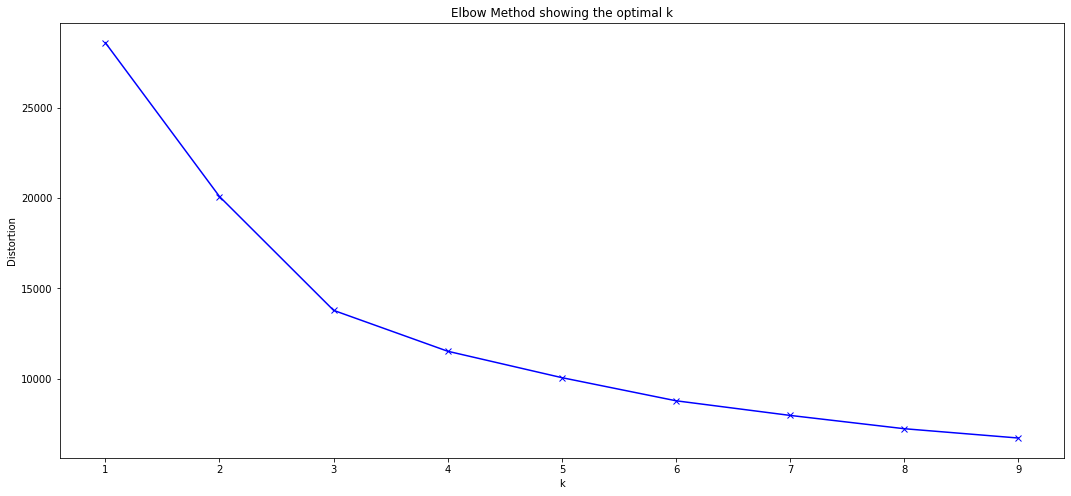

In [ ]:
from sklearn.cluster import KMeans

# select the three variables of interest
X = df[['review', 'satisfaction', 'tenure']]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine the optimal number of clusters using the elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)
plt.figure(figsize = (18, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method showing the optimal k')
plt.show()

The elbow method suggests that the `optimal` number of clusters is 3 

## K-means Clustering

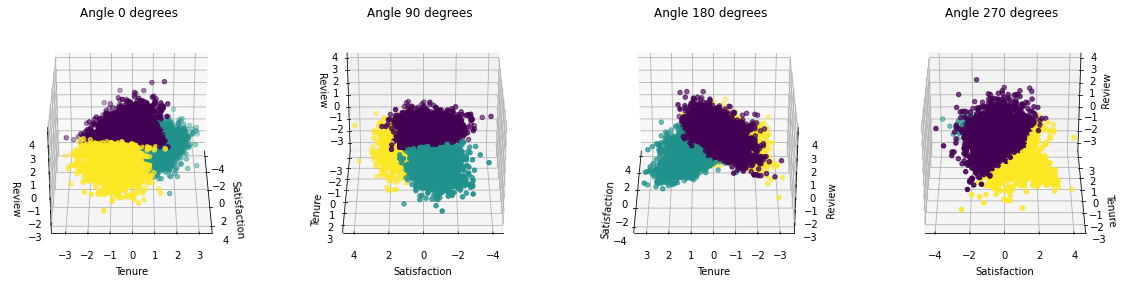

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X_scaled)

# 3D plot of the clusters with different angles
fig, axs = plt.subplots(1, 4, subplot_kw={'projection': '3d'}, figsize=(20, 10))
axs[0].view_init(30, 0)
axs[1].view_init(30, 90)
axs[2].view_init(30, 180)
axs[3].view_init(30, 270)
for i, ax in enumerate(axs):
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels)
    ax.set_xlabel('Satisfaction')
    ax.set_ylabel('Tenure')
    ax.set_zlabel('Review')
    ax.set_title(f'Angle {i*90} degrees')
plt.show()



In [ ]:
# Extracting labels from kmeans
labels = kmeans.labels_
X['clusters'] = labels

# Checking centroids means for each cluster
centroids = X.groupby('clusters')[['review', 'satisfaction', 'tenure']].mean().round(2)
centroids

<ipython-input-100-70b8ccba5712>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clusters'] = labels


,review,satisfaction,tenure
clusters,,,
0,0.63,0.45,7.85
1,0.60,0.68,5.71
2,0.74,0.39,5.68


Based on the results of `k-means` clustering, we can classify the employees into three distinct groups or classes.

* `Experienced and Satisfied Employees`

These employees have been working for a long time and have a high level of job satisfaction.
* `New and Satisfied Employees`

These employees are relatively new to the company but have a high level of job satisfaction.
* `New and Unsatisfied Employees`

These employees are relatively new to the company and have a low level of job satisfaction.

## Hierarchical clustering

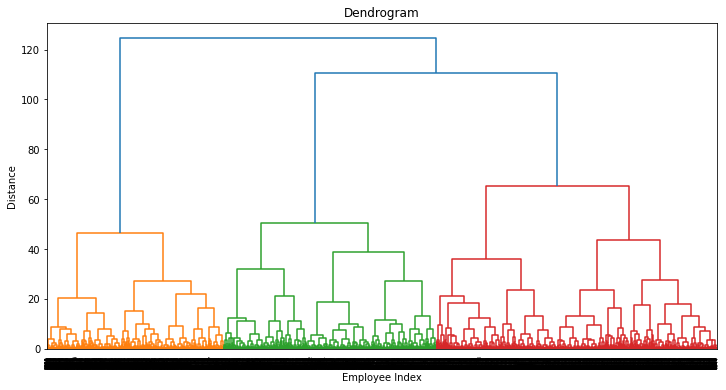

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Employee Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Extracting labels with fcluster
labels_hc = fcluster(Z, 70, criterion='distance')
X['clusters_hc'] = labels_hc

# Calculate mean values of each variable by cluster
means = X.drop('clusters',axis=1).groupby('clusters_hc').mean().round(2)
means


<ipython-input-122-3d2dafa143da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clusters_hc'] = labels_hc


,review,satisfaction,tenure
clusters_hc,,,
1,0.60,0.69,5.52
2,0.73,0.41,5.80
3,0.63,0.46,7.78


Based on the last results, we can conclude that `hierarchical clustering` and `k-means` clustering produce similar results when applied to our dataset. Both methods identified the same number of clusters with similar patterns.

## 📈  Turnover Predictions